# Simple Object Detection Tutorial

## Import libraries

In [2]:
import tensorflow as tf
import numpy as np
from utils import label_map_util
from utils import visualization_utils
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
%matplotlib inline

In [4]:
model_file_path = "ssd_mobilenet_v1_coco_2018_01_28/frozen_inference_graph.pb"
label_file_path = "data/mscoco_label_map.pbtxt"

In [6]:
category_index = label_map_util.create_category_index_from_labelmap(label_file_path, use_display_name=True)

# Tensorflow Graph

In [7]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(model_file_path, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

# Run inference

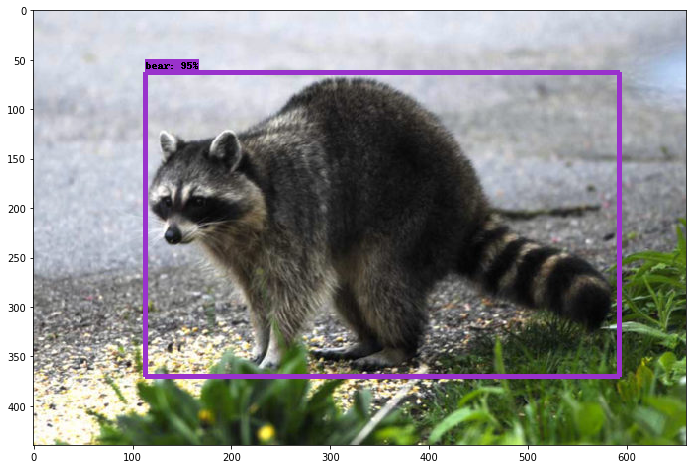

In [8]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image = Image.open('test_images/image2.jpg')
        image_np = np.array(image)
        image_np_expanded = np.expand_dims(image_np, axis=0)
        # Extract image tensor
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Extract detection boxes
        boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Extract detection scores
        scores = detection_graph.get_tensor_by_name('detection_scores:0')
        # Extract detection classes
        classes = detection_graph.get_tensor_by_name('detection_classes:0')
        # Extract number of detections
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        # Actual detection
        (boxes, scores, classes, num_detections) = sess.run([boxes, scores, classes, num_detections], feed_dict={image_tensor: image_np_expanded})
        visualization_utils.visualize_boxes_and_labels_on_image_array(
            image_np,
            np.squeeze(boxes),
            np.squeeze(classes).astype(np.int32),
            np.squeeze(scores),
            category_index,
            use_normalized_coordinates=True,
            line_thickness=5
        )
        plt.figure(figsize=(12, 8))
        plt.imshow(image_np)